In [45]:
# imports
import numpy as np
import os
from skimage.measure import label, regionprops
from skimage.draw import line, set_color, circle, circle_perimeter
import skvideo.io
import imageio
import operator
import math
import cv2
import pandas as pd

import time

import warnings
warnings.simplefilter("ignore", UserWarning)
import nelpy as nel  
import nelpy.plotting as npl
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm.notebook import tqdm as tqdm

## Homography

In [46]:
# let's go ahead and find all homographies. We'll have all head coords in cm after this cell
streakerDay0 = [[127, 51], [106, 414], [474, 424], [474, 60]]
streakerDay1 = [[147, 70], [128, 438], [498, 444], [499, 82]]
streakerDay2 = [[102, 67], [89, 430], [458, 435], [451, 70]]
streakerDay3 = [[106, 73], [456, 63], [475, 426], [105, 436]]

In [47]:
squeakerDay0 = [[128, 54], [108, 412], [474, 425], [474, 62]]
squeakerDay1 = [[148, 72], [130, 435], [497, 446], [498, 84]]
squeakerDay2 = [[103, 71], [91, 428], [455, 432], [452, 70]]
squeakerDay3 = [[107, 73], [107, 435], [478, 426], [456, 63]]

In [48]:
islandDay1 = [[130, 48], [107, 408], [474, 416], [477, 59]]
islandDay2 = [[129, 51], [109, 409], [475, 419], [474, 58]]
islandDay3 = [[128, 49], [107, 410], [475, 417], [475, 59]]
islandDay4 = [[127, 49], [108, 408], [475, 417], [475, 58]]

In [49]:
juneDay1 = [[127, 49], [106, 408], [475, 419], [474, 59]]
juneDay2 = [[127, 47], [107, 408], [478, 420], [479, 57]]
juneDay3 = [[126, 49], [108, 409], [476, 420], [475, 57]]
juneDay4 = [[127, 47], [108, 410], [478, 420], [476, 57]]

In [50]:
FinalControlDay1 = [[128,50], [476,417], [109,409], [478,58]]
FinalControlDay2 = [[130,51], [109, 407], [476,415], [475,56]]
FinalControlDay3 = [[129,50], [109,409], [477,421], [471,59]]
FinalControlDay4 = [[129,52], [108,408], [477,419], [476,58]]
FinalControlDay5 = [[130,50], [474,54], [475,418], [108,409]]

In [51]:
#Find homography
source_pts = np.array(streakerDay0, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm

homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though
# POINTMOO = np.array([[headPos[0,0],headPos[0,1]]],dtype = 'float32')
# POINTMOO = np.array([POINTMOO])
# dst_pt = cv2.perspectiveTransform(POINTMOO, homography_matrix)
# print(dst_pt.squeeze())

In [52]:
print("Streaker Day 0")
streakerfamday0 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Streaker/Streakerfamday0.npz')
streakertestday0 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Streaker/Streakertestday0.npz')
print('fam session familiar location:', streakerfamday0['obj1PosArray'])
print('int frames:',streakerfamday0['obj1NumofIntFrames'])
print('fam session novel location:',streakerfamday0['obj2PosArray'])
print('int frames:', streakerfamday0['obj2NumofIntFrames'])

print('test session familiar location:',streakertestday0['obj1PosArray'])
print('int frames:', streakertestday0['obj1NumofIntFrames'])
print('test session novel location:',streakertestday0['obj2PosArray'])
print('int frames:', streakertestday0['obj2NumofIntFrames'])

Streaker Day 0
fam session familiar location: [[360 135]]
int frames: 292
fam session novel location: [[364 333]]
int frames: 666
test session familiar location: [[388 151]]
int frames: 627
test session novel location: [[219 333]]
int frames: 527


In [53]:
print("Streaker Day 1")
streakerfamday1 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Streaker/Streakerfamday1.npz')
streakertestday1 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Streaker/Streakertestday1.npz')
print('fam session familiar location:', streakerfamday1['obj1PosArray'])
print('int frames:',streakerfamday1['obj1NumofIntFrames'])
print('fam session novel location:',streakerfamday1['obj2PosArray'])
print('int frames:', streakerfamday1['obj2NumofIntFrames'])

print('test session familiar location:',streakertestday1['obj1PosArray'])
print('int frames:', streakertestday1['obj1NumofIntFrames'])
print('test session novel location:',streakertestday1['obj2PosArray'])
print('int frames:', streakertestday1['obj2NumofIntFrames'])

Streaker Day 1
fam session familiar location: [[388 333]]
int frames: 2503
fam session novel location: [[228 156]]
int frames: 2443
test session familiar location: [[411 367]]
int frames: 802
test session novel location: [[222 356]]
int frames: 1393


In [54]:
print("Streaker Day 2 Session 1")
streakerfam1day2 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Streaker/Streakerfam1day2.npz')
streakertest1day2 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Streaker/Streakertest1day2.npz')
print('fam session familiar location:', streakerfam1day2['obj1PosArray'])
print('int frames:',streakerfam1day2['obj1NumofIntFrames'])
print('fam session novel location:',streakerfam1day2['obj2PosArray'])
print('int frames:', streakerfam1day2['obj2NumofIntFrames'])

print('test session familiar location:',streakertest1day2['obj1PosArray'])
print('int frames:', streakertest1day2['obj1NumofIntFrames'])
print('test session novel location:',streakertest1day2['obj2PosArray'])
print('int frames:', streakertest1day2['obj2NumofIntFrames'])

Streaker Day 2 Session 1
fam session familiar location: [[191 134]]
int frames: 521
fam session novel location: [[188 351]]
int frames: 3505
test session familiar location: [[184 141]]
int frames: 848
test session novel location: [[369 352]]
int frames: 438


In [55]:
print("Streaker Day 2 Session 2")
streakerfam2day2 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Streaker/Streakerfam2day2.npz')
streakertest2day2 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Streaker/Streakertest2day2.npz')
print('fam session familiar location:', streakerfam2day2['obj1PosArray'])
print('int frames:', streakerfam2day2['obj1NumofIntFrames'])
print('fam session novel location:',streakerfam2day2['obj2PosArray'])
print('int frames:', streakerfam2day2['obj2NumofIntFrames'])

print('test session familiar location:',streakertest2day2['obj1PosArray'])
print('int frames:', streakertest2day2['obj1NumofIntFrames'])
print('test session novel location:',streakertest2day2['obj2PosArray'])
print('int frames:', streakertest2day2['obj2NumofIntFrames'])

Streaker Day 2 Session 2
fam session familiar location: [[163 361]]
int frames: 1287
fam session novel location: [[384 129]]
int frames: 1538
test session familiar location: [[164 359]]
int frames: 1380
test session novel location: [[172 124]]
int frames: 497


In [56]:
print("Streaker Day 3 Session 1")
streakerfam1day3 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Streaker/Streakerfam1day3.npz')
streakertest1day3 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Streaker/Streakertest1day3.npz')
print('fam session familiar location:', streakerfam1day3['obj1PosArray'])
print('int frames:',streakerfam1day3['obj1NumofIntFrames'])
print('fam session novel location:',streakerfam1day3['obj2PosArray'])
print('int frames:', streakerfam1day3['obj2NumofIntFrames'])

print('test session familiar location:',streakertest1day3['obj1PosArray'])
print('int frames:', streakertest1day3['obj1NumofIntFrames'])
print('test session novel location:',streakertest1day3['obj2PosArray'])
print('int frames:', streakertest1day3['obj2NumofIntFrames'])

Streaker Day 3 Session 1
fam session familiar location: [[385 346]]
int frames: 1264
fam session novel location: [[369 138]
 [366  92]]
int frames: 706
test session familiar location: [[391 358]]
int frames: 840
test session novel location: [[185 367]]
int frames: 870


In [57]:
print("Streaker Day 3 Session 2")
streakerfam2day3 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Streaker/Streakerfam2day3.npz')
streakertest2day3 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Streaker/Streakertest2day3.npz')
print('fam session familiar location:', streakerfam2day3['obj1PosArray'])
print('int frames:', streakerfam2day3['obj1NumofIntFrames'])
print('fam session novel location:',streakerfam2day3['obj2PosArray'])
print('int frames:', streakerfam2day3['obj2NumofIntFrames'])

print('test session familiar location:',streakertest2day3['obj1PosArray'])
print('int frames:', streakertest2day3['obj1NumofIntFrames'])
print('test session novel location:',streakertest2day3['obj2PosArray'])
print('int frames:', streakertest2day3['obj2NumofIntFrames'])

Streaker Day 3 Session 2
fam session familiar location: [[385 121]]
int frames: 713
fam session novel location: [[179 137]]
int frames: 1175
test session familiar location: [[380 141]]
int frames: 257
test session novel location: [[175 367]]
int frames: 680


In [58]:
print("Squeaker Day 0")
squeakerfamday0 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Squeaker/Squeakerfamday0.npz')
squeakertestday0 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Squeaker/Squeakertestday0.npz')
print('fam session familiar location:', squeakerfamday0['obj1PosArray'])
print('int frames:',squeakerfamday0['obj1NumofIntFrames'])
print('fam session novel location:',squeakerfamday0['obj2PosArray'])
print('int frames:', squeakerfamday0['obj2NumofIntFrames'])

print('test session familiar location:',squeakertestday0['obj1PosArray'])
print('int frames:', squeakertestday0['obj1NumofIntFrames'])
print('test session novel location:',squeakertestday0['obj2PosArray'])
print('int frames:', squeakertestday0['obj2NumofIntFrames'])

Squeaker Day 0
fam session familiar location: [[360 137]]
int frames: 1016
fam session novel location: [[352 314]]
int frames: 1067
test session familiar location: [[404 150]]
int frames: 65
test session novel location: [[225 318]]
int frames: 900


In [59]:
print("Squeaker Day 1")
squeakerfamday1 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Squeaker/Squeakerfamday1.npz')
squeakertestday1 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Squeaker/Squeakertestday1.npz')
print('fam session familiar location:', squeakerfamday1['obj1PosArray'])
print('int frames:',squeakerfamday1['obj1NumofIntFrames'])
print('fam session novel location:',squeakerfamday1['obj2PosArray'])
print('int frames:', squeakerfamday1['obj2NumofIntFrames'])

print('test session familiar location:',squeakertestday1['obj1PosArray'])
print('int frames:', squeakertestday1['obj1NumofIntFrames'])
print('test session novel location:',squeakertestday1['obj2PosArray'])
print('int frames:', squeakertestday1['obj2NumofIntFrames'])

Squeaker Day 1
fam session familiar location: [[422 357]]
int frames: 427
fam session novel location: [[226 145]]
int frames: 1274
test session familiar location: [[421 374]]
int frames: 461
test session novel location: [[209 366]]
int frames: 961


In [60]:
print("Squeaker Day 2 Session 1")
squeakerfam1day2 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Squeaker/Squeakerfam1day2.npz')
squeakertest1day2 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Squeaker/Squeakertest1day2.npz')
print('fam session familiar location:', squeakerfam1day2['obj1PosArray'])
print('int frames:',squeakerfam1day2['obj1NumofIntFrames'])
print('fam session novel location:',squeakerfam1day2['obj2PosArray'])
print('int frames:', squeakerfam1day2['obj2NumofIntFrames'])

print('test session familiar location:',squeakertest1day2['obj1PosArray'])
print('int frames:', squeakertest1day2['obj1NumofIntFrames'])
print('test session novel location:',squeakertest1day2['obj2PosArray'])
print('int frames:', squeakertest1day2['obj2NumofIntFrames'])

Squeaker Day 2 Session 1
fam session familiar location: [[207 152]]
int frames: 1328
fam session novel location: [[191 342]]
int frames: 3257
test session familiar location: [[170 144]]
int frames: 623
test session novel location: [[377 367]]
int frames: 1577


In [61]:
print("Squeaker Day 2 Session 2")
squeakerfam2day2 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Squeaker/Squeakerfam2day2.npz')
squeakertest2day2 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Squeaker/Squeakertest2day2.npz')
print('fam session familiar location:', squeakerfam2day2['obj1PosArray'])
print('int frames:',squeakerfam2day2['obj1NumofIntFrames'])
print('fam session novel location:',squeakerfam2day2['obj2PosArray'])
print('int frames:', squeakerfam2day2['obj2NumofIntFrames'])

print('test session familiar location:',squeakertest2day2['obj1PosArray'])
print('int frames:', squeakertest2day2['obj1NumofIntFrames'])
print('test session novel location:',squeakertest2day2['obj2PosArray'])
print('int frames:', squeakertest2day2['obj2NumofIntFrames'])

Squeaker Day 2 Session 2
fam session familiar location: [[183 364]]
int frames: 1482
fam session novel location: [[389 121]]
int frames: 483
test session familiar location: [[194 347]]
int frames: 935
test session novel location: [[185 144]]
int frames: 491


In [62]:
print("Squeaker Day 3 Session 1")
print("Note: he moves the novel location object in the fam session")
squeakerfam1day3 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Squeaker/Squeakerfam1day3.npz')
squeakertest1day3 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Squeaker/Squeakertest1day3.npz')
print('fam session familiar location:', squeakerfam1day3['obj1PosArray'])
print('int frames:',squeakerfam1day3['obj1NumofIntFrames'])
print('fam session novel location:',squeakerfam1day3['obj2PosArray'])
print('int frames:', squeakerfam1day3['obj2NumofIntFrames'])

print('test session familiar location:',squeakertest1day3['obj1PosArray'])
print('int frames:', squeakertest1day3['obj1NumofIntFrames'])
print('test session novel location:',squeakertest1day3['obj2PosArray'])
print('int frames:', squeakertest1day3['obj2NumofIntFrames'])

Squeaker Day 3 Session 1
Note: he moves the novel location object in the fam session
fam session familiar location: [[382 347]]
int frames: 1018
fam session novel location: [[379 128]]
int frames: 1291
test session familiar location: [[381 356]]
int frames: 0
test session novel location: [[188 362]]
int frames: 223


In [63]:
print("Squeaker Day 3 Session 2")
squeakerfam2day3 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Squeaker/Squeakerfam2day3.npz')
squeakertest2day3 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Squeaker/Squeakertest2day3.npz')
print('fam session familiar location:', squeakerfam2day3['obj1PosArray'])
print('int frames:', squeakerfam2day3['obj1NumofIntFrames'])
print('fam session novel location:',squeakerfam2day3['obj2PosArray'])
print('int frames:', squeakerfam2day3['obj2NumofIntFrames'])

print('test session familiar location:',squeakertest2day3['obj1PosArray'])
print('int frames:', squeakertest2day3['obj1NumofIntFrames'])
print('test session novel location:',squeakertest2day3['obj2PosArray'])
print('int frames:', squeakertest2day3['obj2NumofIntFrames'])

Squeaker Day 3 Session 2
fam session familiar location: [[354 122]]
int frames: 167
fam session novel location: [[185 128]]
int frames: 685
test session familiar location: [[394 127]]
int frames: 0
test session novel location: [[185 361]]
int frames: 485


In [64]:
print("Island Day 1")
islandfamday1 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Island/Islandfamday1.npz')
islandtestday1 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Island/Islandtestday1.npz')
print('fam session familiar location:', islandfamday1['obj1PosArray'])
print('int frames:',islandfamday1['obj1NumofIntFrames'])
print('fam session novel location:',islandfamday1['obj2PosArray'])
print('int frames:', islandfamday1['obj2NumofIntFrames'])

print('test session familiar location:',islandtestday1['obj1PosArray'])
print('int frames:', islandtestday1['obj1NumofIntFrames'])
print('test session novel location:',islandtestday1['obj2PosArray'])
print('int frames:', islandtestday1['obj2NumofIntFrames'])

Island Day 1
fam session familiar location: [[366 285]]
int frames: 1641
fam session novel location: [[379 170]]
int frames: 585
test session familiar location: [[365 285]]
int frames: 444
test session novel location: [[249 290]]
int frames: 697


In [65]:
print("Island Day 2")
islandfamday2 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Island/Islandfamday2.npz')
islandtestday2 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Island/Islandtestday2.npz')
print('fam session familiar location:', islandfamday2['obj1PosArray'])
print('int frames:',islandfamday2['obj1NumofIntFrames'])
print('fam session novel location:',islandfamday2['obj2PosArray'])
print('int frames:', islandfamday2['obj2NumofIntFrames'])

print('test session familiar location:',islandtestday2['obj1PosArray'])
print('int frames:', islandtestday2['obj1NumofIntFrames'])
print('test session novel location:',islandtestday2['obj2PosArray'])
print('int frames:', islandtestday2['obj2NumofIntFrames'])

Island Day 2
fam session familiar location: [[261 122]]
int frames: 1412
fam session novel location: [[375 306]]
int frames: 489
test session familiar location: [[263 121]]
int frames: 548
test session novel location: [[258 295]]
int frames: 801


In [66]:
print("Island Day 4")
islandfamday4 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Island/Islandfamday4.npz')
islandtestday4 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/Island/Islandtestday4.npz')
print('fam session familiar location:', islandfamday4['obj1PosArray'])
print('int frames:',islandfamday4['obj1NumofIntFrames'])
print('fam session novel location:',islandfamday4['obj2PosArray'])
print('int frames:', islandfamday4['obj2NumofIntFrames'])

print('test session familiar location:',islandtestday4['obj1PosArray'])
print('int frames:', islandtestday4['obj1NumofIntFrames'])
print('test session novel location:',islandtestday4['obj2PosArray'])
print('int frames:', islandtestday4['obj2NumofIntFrames'])

Island Day 4
fam session familiar location: [[249 142]]
int frames: 834
fam session novel location: [[235 333]]
int frames: 887
test session familiar location: [[250 143]]
int frames: 316
test session novel location: [[376 150]]
int frames: 771


In [67]:
print("JunePhatRat Day 1")
junefamday1 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/JunePhatRat/junefamday1.npz')
junetestday1 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/JunePhatRat/junetestday1.npz')
print('fam session familiar location:', junefamday1['obj1PosArray'])
print('int frames:',junefamday1['obj1NumofIntFrames'])
print('fam session novel location:',junefamday1['obj2PosArray'])
print('int frames:', junefamday1['obj2NumofIntFrames'])

print('test session familiar location:',junetestday1['obj1PosArray'])
print('int frames:', junetestday1['obj1NumofIntFrames'])
print('test session novel location:',junetestday1['obj2PosArray'])
print('int frames:', junetestday1['obj2NumofIntFrames'])

JunePhatRat Day 1
fam session familiar location: [[237 315]]
int frames: 3490
fam session novel location: [[226 149]]
int frames: 2945
test session familiar location: [[237 315]]
int frames: 1424
test session novel location: [[362 298]]
int frames: 2668


In [68]:
print("JunePhatRat Day 2")
junefamday2 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/JunePhatRat/junefamday2.npz')
junetestday2 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/JunePhatRat/junetestday2.npz')
print('fam session familiar location:', junefamday2['obj1PosArray'])
print('int frames:',junefamday2['obj1NumofIntFrames'])
print('fam session novel location:',junefamday2['obj2PosArray'])
print('int frames:', junefamday2['obj2NumofIntFrames'])

print('test session familiar location:',junetestday2['obj1PosArray'])
print('int frames:', junetestday2['obj1NumofIntFrames'])
print('test session novel location:',junetestday2['obj2PosArray'])
print('int frames:', junetestday2['obj2NumofIntFrames'])

JunePhatRat Day 2
fam session familiar location: [[377 169]]
int frames: 487
fam session novel location: [[253 300]]
int frames: 1690
test session familiar location: [[376 172]]
int frames: 513
test session novel location: [[242 171]]
int frames: 1042


In [69]:
print("JunePhatRat Day 3 Session 1")
junefam1day3 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/JunePhatRat/junefam1day3.npz')
junetest1day3 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/JunePhatRat/junetest1day3.npz')
print('fam session familiar location:', junefam1day3['obj1PosArray'])
print('int frames:',junefam1day3['obj1NumofIntFrames'])
print('fam session novel location:',junefam1day3['obj2PosArray'])
print('int frames:', junefam1day3['obj2NumofIntFrames'])

print('test session familiar location:',junetest1day3['obj1PosArray'])
print('int frames:', junetest1day3['obj1NumofIntFrames'])
print('test session novel location:',junetest1day3['obj2PosArray'])
print('int frames:', junetest1day3['obj2NumofIntFrames'])

JunePhatRat Day 3 Session 1
fam session familiar location: [[238 314]]
int frames: 1899
fam session novel location: [[367 317]]
int frames: 1313
test session familiar location: [[240 316]]
int frames: 1327
test session novel location: [[383 155]]
int frames: 1430


In [70]:
print("JunePhatRat Day 3 Session 2")
junefam2day3 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/JunePhatRat/junefam2day3.npz')
junetest2day3 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/JunePhatRat/junetest2day3.npz')
print('fam session familiar location:', junefam2day3['obj1PosArray'])
print('int frames:',junefam2day3['obj1NumofIntFrames'])
print('fam session novel location:',junefam2day3['obj2PosArray'])
print('int frames:', junefam2day3['obj2NumofIntFrames'])

print('test session familiar location:',junetest2day3['obj1PosArray'])
print('int frames:', junetest2day3['obj1NumofIntFrames'])
print('test session novel location:',junetest2day3['obj2PosArray'])
print('int frames:', junetest2day3['obj2NumofIntFrames'])

JunePhatRat Day 3 Session 2
fam session familiar location: [[383 140]]
int frames: 548
fam session novel location: [[241 304]]
int frames: 2231
test session familiar location: [[381 140]]
int frames: 338
test session novel location: [[237 146]]
int frames: 1678


In [71]:
print("JunePhatRat Day 4")
junefamday4 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/JunePhatRat/junefamday4.npz')
junetestday4 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/JunePhatRat/junetestday4.npz')
print('fam session familiar location:', junefamday4['obj1PosArray'])
print('int frames:',junefamday4['obj1NumofIntFrames'])
print('fam session novel location:',junefamday4['obj2PosArray'])
print('int frames:', junefamday4['obj2NumofIntFrames'])

print('test session familiar location:',junetestday4['obj1PosArray'])
print('int frames:', junetestday4['obj1NumofIntFrames'])
print('test session novel location:',junetestday4['obj2PosArray'])
print('int frames:', junetestday4['obj2NumofIntFrames'])

JunePhatRat Day 4
fam session familiar location: [[249 312]]
int frames: 688
fam session novel location: [[251 160]]
int frames: 918
test session familiar location: [[246 311]]
int frames: 465
test session novel location: [[363 308]]
int frames: 1380


In [72]:
print("FinalControl Day 1")
FinalControlfamday1 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControlfamday1.npz')
FinalControltestday1 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControltestday1.npz')
print('fam session familiar location:', FinalControlfamday1['obj1PosArray'])
print('int frames:',FinalControlfamday1['obj1NumofIntFrames'])
print('fam session novel location:',FinalControlfamday1['obj2PosArray'])
print('int frames:', FinalControlfamday1['obj2NumofIntFrames'])

print('test session familiar location:',FinalControltestday1['obj1PosArray'])
print('int frames:', FinalControltestday1['obj1NumofIntFrames'])
print('test session novel location:',FinalControltestday1['obj2PosArray'])
print('int frames:', FinalControltestday1['obj2NumofIntFrames'])

FinalControl Day 1
fam session familiar location: [[363 313]]
int frames: 2068
fam session novel location: [[241 162]]
int frames: 790
test session familiar location: [[357 312]]
int frames: 177
test session novel location: [[367 148]]
int frames: 487


In [73]:
print("FinalControl Day 2")
FinalControlfamday2 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControlfamday2.npz')
FinalControltestday2 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControltestday2.npz')
print('fam session familiar location:', FinalControlfamday2['obj1PosArray'])
print('int frames:',FinalControlfamday2['obj1NumofIntFrames'])
print('fam session novel location:',FinalControlfamday2['obj2PosArray'])
print('int frames:', FinalControlfamday2['obj2NumofIntFrames'])

print('test session familiar location:',FinalControltestday2['obj1PosArray'])
print('int frames:', FinalControltestday2['obj1NumofIntFrames'])
print('test session novel location:',FinalControltestday2['obj2PosArray'])
print('int frames:', FinalControltestday2['obj2NumofIntFrames'])

FinalControl Day 2
fam session familiar location: [[369 151]]
int frames: 1940
fam session novel location: [[361 299]]
int frames: 1668
test session familiar location: [[363 147]]
int frames: 1260
test session novel location: [[236 153]]
int frames: 733


In [74]:
print("FinalControl Day 3")
FinalControlfamday3 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControlfamday3.npz')
FinalControltestday3 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControltestday3.npz')
print('fam session familiar location:', FinalControlfamday3['obj1PosArray'])
print('int frames:',FinalControlfamday3['obj1NumofIntFrames'])
print('fam session novel location:',FinalControlfamday3['obj2PosArray'])
print('int frames:', FinalControlfamday3['obj2NumofIntFrames'])

print('test session familiar location:',FinalControltestday3['obj1PosArray'])
print('int frames:', FinalControltestday3['obj1NumofIntFrames'])
print('test session novel location:',FinalControltestday3['obj2PosArray'])
print('int frames:', FinalControltestday3['obj2NumofIntFrames'])

FinalControl Day 3
fam session familiar location: [[353 159]]
int frames: 1684
fam session novel location: [[344 293]]
int frames: 3590
test session familiar location: [[352 157]]
int frames: 1315
test session novel location: [[229 324]]
int frames: 1942


In [75]:
print("FinalControl Day 4 Session 1")
FinalControlfam1day4 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControlfam1day4.npz')
FinalControltest1day4 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControltest1day4.npz')
print('fam session familiar location:', FinalControlfam1day4['obj1PosArray'])
print('int frames:',FinalControlfam1day4['obj1NumofIntFrames'])
print('fam session novel location:',FinalControlfam1day4['obj2PosArray'])
print('int frames:', FinalControlfam1day4['obj2NumofIntFrames'])

print('test session familiar location:',FinalControltest1day4['obj1PosArray'])
print('int frames:', FinalControltest1day4['obj1NumofIntFrames'])
print('test session novel location:',FinalControltest1day4['obj2PosArray'])
print('int frames:', FinalControltest1day4['obj2NumofIntFrames'])

FinalControl Day 4 Session 1
fam session familiar location: [[220 147]]
int frames: 316
fam session novel location: [[226 296]]
int frames: 1825
test session familiar location: [[224 149]]
int frames: 571
test session novel location: [[360 154]]
int frames: 503


In [76]:
print("FinalControl Day 4 Session 2")
FinalControlfam2day4 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControlfam2day4.npz')
FinalControltest2day4 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControltest2day4.npz')
print('fam session familiar location:', FinalControlfam2day4['obj1PosArray'])
print('int frames:',FinalControlfam2day4['obj1NumofIntFrames'])
print('fam session novel location:',FinalControlfam2day4['obj2PosArray'])
print('int frames:', FinalControlfam2day4['obj2NumofIntFrames'])

print('test session familiar location:',FinalControltest2day4['obj1PosArray'])
print('int frames:', FinalControltest2day4['obj1NumofIntFrames'])
print('test session novel location:',FinalControltest2day4['obj2PosArray'])
print('int frames:', FinalControltest2day4['obj2NumofIntFrames'])

FinalControl Day 4 Session 2
fam session familiar location: [[226 155]]
int frames: 1460
fam session novel location: [[341 163]]
int frames: 7455
test session familiar location: [[225 150]]
int frames: 1770
test session novel location: [[369 309]]
int frames: 1937


In [77]:
print("FinalControl Day 5")
FinalControlfamday5 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControlfamday5.npz')
FinalControltestday5 = np.load('/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControltestday5.npz')
print('fam session familiar location:', FinalControlfamday5['obj1PosArray'])
print('int frames:',FinalControlfamday5['obj1NumofIntFrames'])
print('fam session novel location:',FinalControlfamday5['obj2PosArray'])
print('int frames:', FinalControlfamday5['obj2NumofIntFrames'])

print('test session familiar location:',FinalControltestday5['obj1PosArray'])
print('int frames:', FinalControltestday5['obj1NumofIntFrames'])
print('test session novel location:',FinalControltestday5['obj2PosArray'])
print('int frames:', FinalControltestday5['obj2NumofIntFrames'])

FinalControl Day 5
fam session familiar location: [[234 324]]
int frames: 666
fam session novel location: [[247 148]]
int frames: 214
test session familiar location: [[236 320]]
int frames: 511
test session novel location: [[380 141]]
int frames: 359


# Quick novelty preference plots
$\frac{(nov-fam)}{(nov+fam)}$<br>
Carr-Larkin Hippocampus 2014

In [78]:
famControl = np.array([streakerfamday0['obj1NumofIntFrames'], streakerfamday1['obj1NumofIntFrames'], streakerfam1day2['obj1NumofIntFrames'], streakerfam2day2['obj1NumofIntFrames'], streakerfam1day3['obj1NumofIntFrames'], streakerfam2day3['obj1NumofIntFrames'], squeakerfamday0['obj1NumofIntFrames'], squeakerfamday1['obj1NumofIntFrames'], squeakerfam1day2['obj1NumofIntFrames'], squeakerfam2day2['obj1NumofIntFrames'], squeakerfam1day3['obj1NumofIntFrames'], squeakerfam2day3['obj1NumofIntFrames'], islandfamday1['obj1NumofIntFrames'], islandfamday2['obj1NumofIntFrames'], islandfamday4['obj1NumofIntFrames'],junefamday1['obj1NumofIntFrames'],junefamday2['obj1NumofIntFrames'], junefam1day3['obj1NumofIntFrames'], junefam2day3['obj1NumofIntFrames'], junefamday4['obj1NumofIntFrames'], FinalControlfamday1['obj1NumofIntFrames'], FinalControlfamday2['obj1NumofIntFrames'], FinalControlfamday3['obj1NumofIntFrames'], FinalControlfam1day4['obj1NumofIntFrames'], FinalControlfam2day4['obj1NumofIntFrames'], FinalControlfamday5['obj1NumofIntFrames']])
novControl = np.array([streakerfamday0['obj2NumofIntFrames'], streakerfamday1['obj2NumofIntFrames'], streakerfam1day2['obj2NumofIntFrames'], streakerfam2day2['obj2NumofIntFrames'], streakerfam1day3['obj2NumofIntFrames'], streakerfam2day3['obj2NumofIntFrames'], squeakerfamday0['obj2NumofIntFrames'], squeakerfamday1['obj2NumofIntFrames'], squeakerfam1day2['obj2NumofIntFrames'], squeakerfam2day2['obj2NumofIntFrames'], squeakerfam1day3['obj2NumofIntFrames'], squeakerfam2day3['obj2NumofIntFrames'], islandfamday1['obj2NumofIntFrames'], islandfamday2['obj2NumofIntFrames'], islandfamday4['obj2NumofIntFrames'],junefamday1['obj2NumofIntFrames'],junefamday2['obj2NumofIntFrames'], junefam1day3['obj2NumofIntFrames'], junefam2day3['obj2NumofIntFrames'], junefamday4['obj2NumofIntFrames'], FinalControlfamday1['obj2NumofIntFrames'], FinalControlfamday2['obj2NumofIntFrames'], FinalControlfamday3['obj2NumofIntFrames'], FinalControlfam1day4['obj2NumofIntFrames'], FinalControlfam2day4['obj2NumofIntFrames'], FinalControlfamday5['obj2NumofIntFrames']])

jimfamControl = np.array([streakerfamday0['obj1NumofIntFrames'], streakerfamday1['obj1NumofIntFrames'], streakerfam1day2['obj1NumofIntFrames'], streakerfam2day2['obj1NumofIntFrames'], streakerfam1day3['obj1NumofIntFrames'], streakerfam2day3['obj1NumofIntFrames'], squeakerfamday0['obj1NumofIntFrames'], squeakerfamday1['obj1NumofIntFrames'], squeakerfam1day2['obj1NumofIntFrames'], squeakerfam2day2['obj1NumofIntFrames'], squeakerfam1day3['obj1NumofIntFrames'], squeakerfam2day3['obj1NumofIntFrames']])
jimnovControl = np.array([streakerfamday0['obj2NumofIntFrames'], streakerfamday1['obj2NumofIntFrames'], streakerfam1day2['obj2NumofIntFrames'], streakerfam2day2['obj2NumofIntFrames'], streakerfam1day3['obj2NumofIntFrames'], streakerfam2day3['obj2NumofIntFrames'], squeakerfamday0['obj2NumofIntFrames'], squeakerfamday1['obj2NumofIntFrames'], squeakerfam1day2['obj2NumofIntFrames'], squeakerfam2day2['obj2NumofIntFrames'], squeakerfam1day3['obj2NumofIntFrames'], squeakerfam2day3['obj2NumofIntFrames']])

shayfamControl = np.array([islandfamday1['obj1NumofIntFrames'], islandfamday2['obj1NumofIntFrames'], islandfamday4['obj1NumofIntFrames'],junefamday1['obj1NumofIntFrames'],junefamday2['obj1NumofIntFrames'], junefam1day3['obj1NumofIntFrames'], junefam2day3['obj1NumofIntFrames'], junefamday4['obj1NumofIntFrames'], FinalControlfamday1['obj1NumofIntFrames'], FinalControlfamday2['obj1NumofIntFrames'], FinalControlfamday3['obj1NumofIntFrames'], FinalControlfam1day4['obj1NumofIntFrames'], FinalControlfam2day4['obj1NumofIntFrames'], FinalControlfamday5['obj1NumofIntFrames']])
shaynovControl = np.array([islandfamday1['obj2NumofIntFrames'], islandfamday2['obj2NumofIntFrames'], islandfamday4['obj2NumofIntFrames'],junefamday1['obj2NumofIntFrames'],junefamday2['obj2NumofIntFrames'], junefam1day3['obj2NumofIntFrames'], junefam2day3['obj2NumofIntFrames'], junefamday4['obj2NumofIntFrames'], FinalControlfamday1['obj2NumofIntFrames'], FinalControlfamday2['obj2NumofIntFrames'], FinalControlfamday3['obj2NumofIntFrames'], FinalControlfam1day4['obj2NumofIntFrames'], FinalControlfam2day4['obj2NumofIntFrames'], FinalControlfamday5['obj2NumofIntFrames']])

plotMeCtrl = (novControl-famControl)/(famControl+novControl)
plotMejimCtrl = (jimnovControl - jimfamControl)/(jimfamControl+jimnovControl)
plotMeshayCtrl = (shaynovControl - shayfamControl)/(shayfamControl+shaynovControl)


In [79]:
plotMeCtrl

array([ 0.39039666, -0.01213101,  0.74118231,  0.08884956, -0.28324873,
        0.24470339,  0.02448392,  0.49794239,  0.42071974, -0.50839695,
        0.118233  ,  0.60798122, -0.47439353, -0.48553393,  0.03079605,
       -0.08469308,  0.55259531, -0.18244085,  0.60561353,  0.14321295,
       -0.44716585, -0.07538803,  0.36139553,  0.70481084,  0.67246214,
       -0.51363636])

In [80]:
famTest = np.array([streakertestday0['obj1NumofIntFrames'], streakertestday1['obj1NumofIntFrames'], streakertest1day2['obj1NumofIntFrames'], streakertest2day2['obj1NumofIntFrames'], streakertest1day3['obj1NumofIntFrames'], streakertest2day3['obj1NumofIntFrames'], squeakertestday0['obj1NumofIntFrames'], squeakertestday1['obj1NumofIntFrames'], squeakertest1day2['obj1NumofIntFrames'], squeakertest2day2['obj1NumofIntFrames'], squeakertest1day3['obj1NumofIntFrames'], squeakertest2day3['obj1NumofIntFrames'], islandtestday1['obj1NumofIntFrames'], islandtestday2['obj1NumofIntFrames'], islandtestday4['obj1NumofIntFrames'],junetestday1['obj1NumofIntFrames'],junetestday2['obj1NumofIntFrames'], junetest1day3['obj1NumofIntFrames'], junetest2day3['obj1NumofIntFrames'], junetestday4['obj1NumofIntFrames'], FinalControltestday1['obj1NumofIntFrames'], FinalControltestday2['obj1NumofIntFrames'], FinalControltestday3['obj1NumofIntFrames'], FinalControltest1day4['obj1NumofIntFrames'], FinalControltest2day4['obj1NumofIntFrames'], FinalControltestday5['obj1NumofIntFrames']])
novTest = np.array([streakertestday0['obj2NumofIntFrames'], streakertestday1['obj2NumofIntFrames'], streakertest1day2['obj2NumofIntFrames'], streakertest2day2['obj2NumofIntFrames'], streakertest1day3['obj2NumofIntFrames'], streakertest2day3['obj2NumofIntFrames'], squeakertestday0['obj2NumofIntFrames'], squeakertestday1['obj2NumofIntFrames'], squeakertest1day2['obj2NumofIntFrames'], squeakertest2day2['obj2NumofIntFrames'], squeakertest1day3['obj2NumofIntFrames'], squeakertest2day3['obj2NumofIntFrames'], islandtestday1['obj2NumofIntFrames'], islandtestday2['obj2NumofIntFrames'], islandtestday4['obj2NumofIntFrames'],junetestday1['obj2NumofIntFrames'],junetestday2['obj2NumofIntFrames'], junetest1day3['obj2NumofIntFrames'], junetest2day3['obj2NumofIntFrames'], junetestday4['obj2NumofIntFrames'], FinalControltestday1['obj2NumofIntFrames'], FinalControltestday2['obj2NumofIntFrames'], FinalControltestday3['obj2NumofIntFrames'], FinalControltest1day4['obj2NumofIntFrames'], FinalControltest2day4['obj2NumofIntFrames'], FinalControltestday5['obj2NumofIntFrames']])
plotMeTest = (novTest-famTest)/(famTest+novTest)

jimfamTest = np.array([streakertestday0['obj1NumofIntFrames'], streakertestday1['obj1NumofIntFrames'], streakertest1day2['obj1NumofIntFrames'], streakertest2day2['obj1NumofIntFrames'], streakertest1day3['obj1NumofIntFrames'], streakertest2day3['obj1NumofIntFrames'], squeakertestday0['obj1NumofIntFrames'], squeakertestday1['obj1NumofIntFrames'], squeakertest1day2['obj1NumofIntFrames'], squeakertest2day2['obj1NumofIntFrames'], squeakertest1day3['obj1NumofIntFrames'], squeakertest2day3['obj1NumofIntFrames']])
jimnovTest = np.array([streakertestday0['obj2NumofIntFrames'], streakertestday1['obj2NumofIntFrames'], streakertest1day2['obj2NumofIntFrames'], streakertest2day2['obj2NumofIntFrames'], streakertest1day3['obj2NumofIntFrames'], streakertest2day3['obj2NumofIntFrames'], squeakertestday0['obj2NumofIntFrames'], squeakertestday1['obj2NumofIntFrames'], squeakertest1day2['obj2NumofIntFrames'], squeakertest2day2['obj2NumofIntFrames'], squeakertest1day3['obj2NumofIntFrames'], squeakertest2day3['obj2NumofIntFrames']])
plotMejimTest = (jimnovTest - jimfamTest) / (jimfamTest + jimnovTest)

shayfamTest = np.array([islandtestday1['obj1NumofIntFrames'], islandtestday2['obj1NumofIntFrames'], islandtestday4['obj1NumofIntFrames'],junetestday1['obj1NumofIntFrames'],junetestday2['obj1NumofIntFrames'], junetest1day3['obj1NumofIntFrames'], junetest2day3['obj1NumofIntFrames'], junetestday4['obj1NumofIntFrames'], FinalControltestday1['obj1NumofIntFrames'], FinalControltestday2['obj1NumofIntFrames'], FinalControltestday3['obj1NumofIntFrames'], FinalControltest1day4['obj1NumofIntFrames'], FinalControltest2day4['obj1NumofIntFrames'], FinalControltestday5['obj1NumofIntFrames']])
shaynovTest = np.array([islandtestday1['obj2NumofIntFrames'], islandtestday2['obj2NumofIntFrames'], islandtestday4['obj2NumofIntFrames'],junetestday1['obj2NumofIntFrames'],junetestday2['obj2NumofIntFrames'], junetest1day3['obj2NumofIntFrames'], junetest2day3['obj2NumofIntFrames'], junetestday4['obj2NumofIntFrames'], FinalControltestday1['obj2NumofIntFrames'], FinalControltestday2['obj2NumofIntFrames'], FinalControltestday3['obj2NumofIntFrames'], FinalControltest1day4['obj2NumofIntFrames'], FinalControltest2day4['obj2NumofIntFrames'], FinalControltestday5['obj2NumofIntFrames']])
plotMeshayTest = (shaynovTest - shayfamTest) / (shayfamTest + shaynovTest)

In [81]:
plotMeshayTest

array([ 0.22173532,  0.18754633,  0.41858326,  0.30400782,  0.34019293,
        0.03735945,  0.66468254,  0.49593496,  0.46686747, -0.26442549,
        0.19250844, -0.06331471,  0.04504991, -0.17471264])

In [82]:
import seaborn as sns

In [83]:
noveltyPref = np.append(plotMeTest,plotMeCtrl)

experimentType = np.array(["Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization"])

noveltyPref = pd.DataFrame(data=np.asarray([noveltyPref,experimentType]).T,columns=['Novelty Preference','Experiment'])
noveltyPref = noveltyPref.astype({"Novelty Preference":plotMeTest.dtype})
noveltyPref



,Novelty Preference,Experiment
0,-0.086655,Test
1,0.269248,Test
2,-0.318818,Test
3,-0.470432,Test
4,0.017544,Test
5,0.451441,Test
6,0.865285,Test
7,0.351617,Test
8,0.433636,Test
9,-0.311360,Test


In [84]:
jimnoveltyPref = np.append(plotMejimTest, plotMejimCtrl)
shaynoveltyPref = np.append(plotMeshayTest, plotMeshayCtrl)

jimexperimentType = np.array(["Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization"])
shayexperimentType = np.array(["Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Test","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization","Familiarization"])

jimnoveltyPref = pd.DataFrame(data=np.asarray([jimnoveltyPref,jimexperimentType]).T,columns=['Jim Novelty Preference','Jim Experiment'])
jimnoveltyPref = jimnoveltyPref.astype({"Jim Novelty Preference":plotMejimTest.dtype})
jimnoveltyPref

shaynoveltyPref = pd.DataFrame(data=np.asarray([shaynoveltyPref,shayexperimentType]).T,columns=['Shay Novelty Preference','Shay Experiment'])
shaynoveltyPref = shaynoveltyPref.astype({"Shay Novelty Preference":plotMeshayTest.dtype})
shaynoveltyPref

,Shay Novelty Preference,Shay Experiment
0,0.221735,Test
1,0.187546,Test
2,0.418583,Test
3,0.304008,Test
4,0.340193,Test
5,0.037359,Test
6,0.664683,Test
7,0.495935,Test
8,0.466867,Test
9,-0.264425,Test


In [85]:
# Shay's plot settings
npl.setup()
npl.set_palette(npl.colors.cows)
npl.setup(font='Universalis ADF Std', font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':33, 'legend.fontsize': 20, 'ytick.labelsize': 10, 'xtick.labelsize': 20}))
%matplotlib inline 

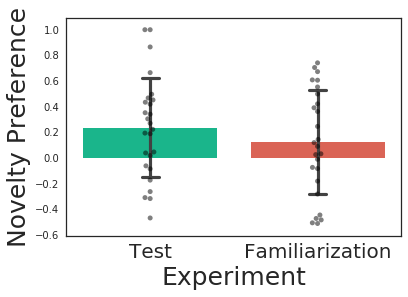

In [86]:
sns.barplot(x="Experiment", y="Novelty Preference", data=noveltyPref, capsize=.1, ci="sd")
sns.swarmplot(x="Experiment", y="Novelty Preference", data=noveltyPref, color="0", alpha=.5)


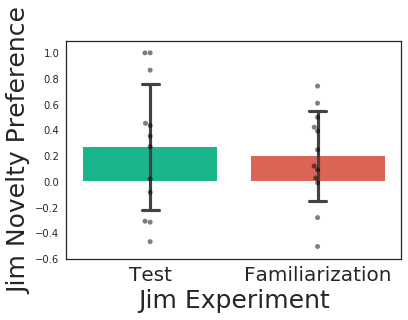

In [87]:
sns.barplot(x="Jim Experiment", y="Jim Novelty Preference", data=jimnoveltyPref, capsize=.1, ci="sd")
sns.swarmplot(x="Jim Experiment", y="Jim Novelty Preference", data=jimnoveltyPref, color="0", alpha=.5)

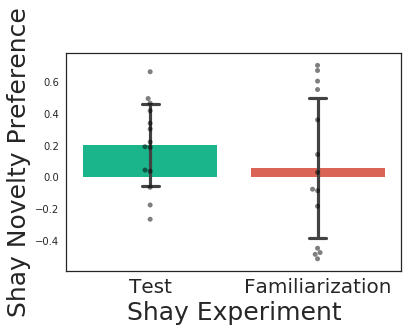

In [88]:
sns.barplot(x="Shay Experiment", y="Shay Novelty Preference", data=shaynoveltyPref, capsize=.1, ci="sd")
sns.swarmplot(x="Shay Experiment", y="Shay Novelty Preference", data=shaynoveltyPref, color="0", alpha=.5)